## Observations and Insights 

## My Observations

1. There were almost an equal number of male to female mice tested.
2. Mice on Naftisol and Stelasyn had a higher average Tumor volume than those that had a placebo.
3. Capomulin had the highest # of mice tested while Propriva had the lowest #.
4. Ramicane's and Infubinol's median are fairly closer to the IQR's midrange than Capomulin's and Ceftamin's.
5. While on Capomulin, mouse l509 had tumor growth until the 20th day. The tumor started to shrink and then it started to grow again after around 35 days.
6. Tumor volume seems to be higher in heavier mice.

---
Module 05 Assignment - Matplotlib Challenge - Summer 2022 - Marjorie Muñoz

In [171]:
# Import the dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how='right', on='Mouse ID')

# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [172]:
# Checking the number of mice. Using unique count as there are multiple entries
num_mice = mouse_study_df["Mouse ID"].nunique()
num_mice

249

In [173]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_study_df["Mouse ID"].value_counts()
dup_mice

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [174]:
# 13 entry is an outlier. why? let's check how many timepoints there are
time_counts = mouse_study_df["Timepoint"].value_counts()
time_counts

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [17]:
# as there are 10 Timepoints, there shouldn't be a mouse with a count of 
# 13 time entries. There must be duplicates for "g989"

In [175]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989", :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [176]:
# Count Current Rows
mouse_study_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [177]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] != "g989", :]
clean_mice_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [ ]:
# we can se that the 1893 number has decreased by 13 rows, confirming the mouse
# "g989" has been removed.

In [178]:
# Checking the number of mice in the clean DataFrame.
new_num_mice = clean_mice_df["Mouse ID"].nunique()
new_num_mice

248

## Summary Statistics

In [179]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_mean = clean_mice_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_median = clean_mice_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
summary_variance = clean_mice_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
summary_stdv= clean_mice_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
summary_sem = clean_mice_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


summary_table_df = pd.DataFrame({
        "Mean Tumor Volume": summary_mean,
        "Median Tumor Volume": summary_median,
        "Tumor Volume Variance": summary_variance,
        "Tumor Volume Std. Dev.": summary_stdv,
        "Volume Std. Error of Mean": summary_sem})

summary_table_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Volume Std. Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [194]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

clean_mice_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median","var","std","sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

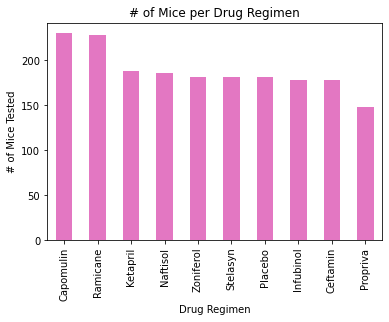

In [195]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# count the mice tested per drug regimen
drug_count = clean_mice_df["Drug Regimen"].value_counts()
#drug_count - left over from checking the output for drug_count

# plot the bar chart
mice_chart = drug_count.plot.bar(color='tab:pink')

# set the X and Y axis labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice Tested")
plt.title("# of Mice per Drug Regimen")

plt.show()

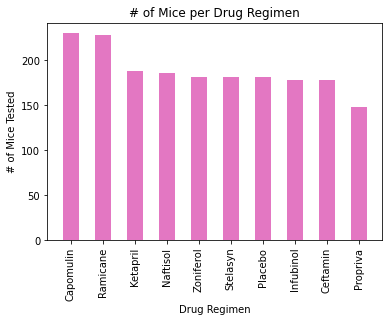

In [196]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# set variables for X and Y axes
x_axis = drug_count.index.values
y_axis = drug_count.values

# plot the bar chart
plt.bar(x_axis, y_axis, color="tab:pink", width=0.5)

# set the X and Y axis labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice Tested")
plt.title("# of Mice per Drug Regimen")

# x axis labels are jumbled together, have to set them vertically
plt.xticks(rotation="vertical")

# print the graph
plt.show()

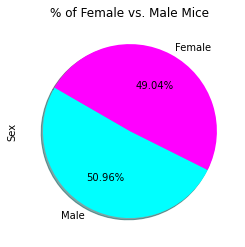

In [197]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# count the entries based on Sex
gender_pie = clean_mice_df["Sex"].value_counts()

# plot the graph, with extra formatting :)
gender_pie.plot.pie(autopct='%.2f%%', cmap='cool', shadow = True, startangle=150)

# set a title 
plt.title("% of Female vs. Male Mice")

# print pie chart
plt.show()

In [184]:
# printing the mice by sex to setup for the request below
gender_pie

Male      958
Female    922
Name: Sex, dtype: int64

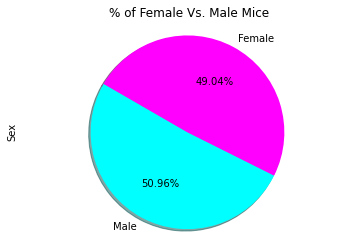

In [185]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# set the pie chart labels, slice sizes and their colors
pie_labels = ["Male","Female"]
pie_sizes = [958, 922]
pie_colors  = ["cyan", "magenta"]

# plot the chart with some extra flair
plt.pie(pie_sizes, labels=pie_labels, colors=pie_colors, autopct='%.2f%%', shadow = True, startangle=150)

# this is to ensure the circle is round
plt.axis("equal")

# setting the labels and chart title
plt.title("% of Female Vs. Male Mice")
plt.ylabel("Sex")

# print chart
plt.show()

## Quartiles, Outliers and Boxplots

In [186]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_study_df.groupby(["Mouse ID"]).max()["Timepoint"]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
time_orig_merge = max_timepoint_df[["Mouse ID","Timepoint"]].\
    merge(clean_mice_df,on=["Mouse ID","Timepoint"],how="left")
time_orig_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20.0,23.0,67.973419,2.0
1,a251,45,Infubinol,Female,21.0,25.0,65.525743,1.0
2,a262,45,Placebo,Female,17.0,29.0,70.717621,4.0
3,a275,45,Ceftamin,Female,20.0,28.0,62.999356,3.0
4,a366,30,Stelasyn,Female,16.0,29.0,63.440686,1.0


In [187]:
# Put treatments into a list for for loop (and later for plot labels)
treat_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treat_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumor_vol = time_orig_merge.loc[time_orig_merge["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(drug_tumor_vol)
    
    # calculate quartiles and upper and lower limits
    quartiles = drug_tumor_vol.quantile([.25,.5,.75]).round(2)
    lowerquant = quartiles[0.25].round(2)
    upperquant = quartiles[0.75].round(2)
    
    # determine outliers using upper and lower bounds
    iqr = round(upperquant-lowerquant,2)
    low_bound = round(lowerquant - (1.5*iqr),2)
    high_bound = round(upperquant + (1.5*iqr),2)
    
    
    # print the results
    print(f"{treatment}'s Test Results:")
    print("----------------------------------")
    print(f"The lower quartile of final tumor volume is: {lowerquant}.")
    print(f"The upper quartile of final tumor volume is: {upperquant}.")
    print(f"The interquartile range (IQR) is: {iqr}.")
    print(f"The values below {low_bound} and above {high_bound} could be outliers.")
    print("----------------------------------\n")

Capomulin's Test Results:
----------------------------------
The lower quartile of final tumor volume is: 32.38.
The upper quartile of final tumor volume is: 40.16.
The interquartile range (IQR) is: 7.78.
The values below 20.71 and above 51.83 could be outliers.
----------------------------------

Ramicane's Test Results:
----------------------------------
The lower quartile of final tumor volume is: 31.56.
The upper quartile of final tumor volume is: 40.66.
The interquartile range (IQR) is: 9.1.
The values below 17.91 and above 54.31 could be outliers.
----------------------------------

Infubinol's Test Results:
----------------------------------
The lower quartile of final tumor volume is: 54.05.
The upper quartile of final tumor volume is: 65.53.
The interquartile range (IQR) is: 11.48.
The values below 36.83 and above 82.75 could be outliers.
----------------------------------

Ceftamin's Test Results:
----------------------------------
The lower quartile of final tumor volume is:

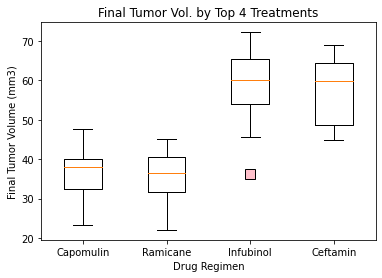

In [188]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# add a format for the plot
markers = dict(markerfacecolor="pink", marker="s", markersize=10)

# the box plot with titles, label and even ticks!
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Vol. by Top 4 Treatments")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data, flierprops = markers)
ax1.set_xticklabels(treat_list)

# display the plot
plt.show()

## Line and Scatter Plots

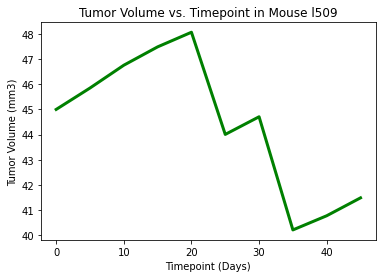

In [189]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_treatment = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin"]

#selecting the mouse from the example "l509"
mouse_treated_df = capomulin_treatment.loc[capomulin_treatment["Mouse ID"] == "l509",:]
#mouse_treated_df.head()  - this was used to test the results 

# set the variables for the x and y axes
x_time = mouse_treated_df["Timepoint"]
y_tumor = mouse_treated_df["Tumor Volume (mm3)"]

# plot the graph
fig2, ax2 = plt.subplots()
plt.plot(x_time, y_tumor, linewidth=3, color="green")

# titles, x and y axes labels 
plt.title("Tumor Volume vs. Timepoint in Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# print the graph
plt.show()

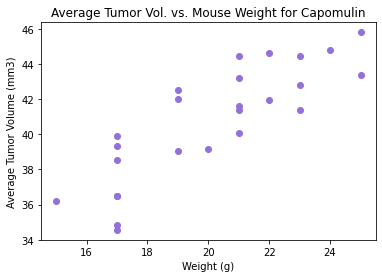

In [190]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# group the DF by the mouse and then get the average
avg_vol_cap = capomulin_treatment.groupby(["Mouse ID"]).mean()

#set the variables for the x and y axes
x_weight = avg_vol_cap["Weight (g)"]
y_tumorvol = avg_vol_cap["Tumor Volume (mm3)"]

# plot the graph
fig3, ax3 = plt.subplots()
plt.scatter(x_weight, y_tumorvol, color="mediumpurple")

# labels and titles
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Vol. vs. Mouse Weight for Capomulin")

# print that chart!
plt.show()

## Correlation and Regression

The correlation coefficient of mouse weight and average tumor volume is 0.84.


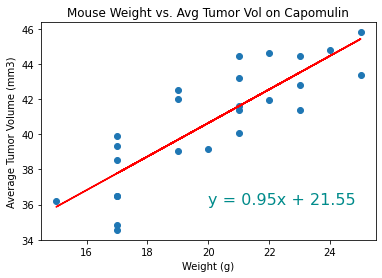

In [199]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# correlation coefficient
cor_coe = st.pearsonr(avg_vol_cap["Weight (g)"],avg_vol_cap["Tumor Volume (mm3)"])
print (f"The correlation coefficient of mouse weight and average tumor volume is {round(cor_coe[0],2)}.")

# linear regression
(slope, intercept, rvalue, pvalue, stderrr) = linregress(x_weight, y_tumorvol)
regress_val = x_weight * slope + intercept

# set the text to show the slope 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,36), fontsize=16, color="darkcyan")

# plot the graph
plt.scatter(x_weight, y_tumorvol)
plt.plot(x_weight, regress_val, "r-")

# labels, x and y axes
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Avg Tumor Vol on Capomulin")

# print our work 
plt.show()